Q&A ACTIVITY

1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name".
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

In [1]:
#1.Loading dataset into python environment

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [3]:
data = pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [6]:
data.shape

(9, 7)

In [7]:
data.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [8]:
data.isnull()

,name,age,income,gender,department,grade,performance_score
0,False,False,True,True,False,False,False
1,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,True,False,True,False,False,False
6,False,False,True,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False


In [9]:
#2.Resetting the index as "name"
df= data.set_index("name")
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [10]:
#3.Selecting rows for specific names Jack Morgan and Josh wills

df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


In [11]:
#4.Selecting data for multiple values "Sales" and “Finance”

df.loc[df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [12]:
#5.Employee who has more than 700 performance score.

df_sales1= df['performance_score']>700
df.loc[df_sales1]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [13]:
#6.Employee who has more than 500 and less than 700 performance score

df_sales2= (df['performance_score']>500) & (df['performance_score']<700)
df.loc[df_sales2]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


In [14]:
#7.Checking and handling missing values in the dataset.

df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [15]:
# Handling the NaN in age 
df['age']=df['age'].fillna(df['age'].median())

# Handling the Nan in income 
df['income']= df['income'].fillna(df['income'].median())

# Handling the NaN in gender using mode
df['gender']= df['gender'].fillna('not mentioned')

df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,not mentioned,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,not mentioned,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [16]:
#rechecking

df.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

<Figure size 504x648 with 0 Axes>

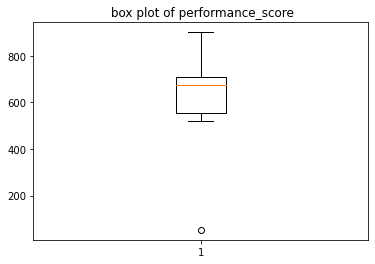

<Figure size 504x648 with 0 Axes>

In [17]:
#8.Checking the outliers and handle outliers in performance score using Percentiles

plt.boxplot(df["performance_score"])
plt.title(' box plot of performance_score')
plt.figure(figsize=(7,9))

In [18]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
print(Q1, Q2, Q3)

IQR=Q3-Q1
print(IQR)

low_limit=Q1-1.5*IQR
upp_limit=Q3+1.5*IQR
print('LOWER LIMIT = ',low_limit)
print('UPPER LIMIT = ',upp_limit)

outlier=[]
for i in df['performance_score']:
    if((i>upp_limit) | (i<low_limit)):
        outlier.append(i)
print("outlier = ",outlier)

556.0 674.0 711.0
155.0
LOWER LIMIT =  323.5
UPPER LIMIT =  943.5
outlier =  [53]


In [19]:
drop_index = df[(df["performance_score"] < low_limit) | (df["performance_score"] > upp_limit)].index
df.drop(drop_index,inplace=True)
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,not mentioned,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,not mentioned,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [20]:
#9.Checking the gender column and do Dummy encoding.
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,not mentioned,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,not mentioned,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [21]:
dummy_df= pd.get_dummies(df, columns=["gender"])
dummy_df

,age,income,department,grade,performance_score,gender_F,gender_M,gender_not mentioned
name,,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,0,0,1
S Kumar,45.0,16000.0,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.0,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.0,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1,0


In [22]:
#10.Standard scaling on the feature performance score.

column=['performance_score']
feature=df[column]
scaler=StandardScaler().fit(feature.values)
feature=scaler.transform(feature.values)
df[column]=feature
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,not mentioned,Operations,G3,0.392262
S Kumar,45.0,16000.0,F,Finance,G0,-1.475872
Jack Morgan,32.0,35000.0,M,Finance,G2,-0.058667
Ying Chin,45.0,65000.0,F,Sales,G3,-1.144578
Dheeraj Patel,30.0,42000.0,F,Operations,G2,0.281831
Satyam Sharma,45.0,62000.0,not mentioned,Sales,G3,-0.288733
Josh Wills,54.0,52000.0,F,Finance,G3,2.030331
Leo Duck,23.0,98000.0,M,Sales,G4,0.263425
